$$
\newcommand{\fudm}[2]{\frac{\mathrm{D} #1}{\mathrm{D} #2}}
\newcommand{\pad}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\ppad}[2]{\frac{\partial^2 #1}{\partial #2^2}}
\newcommand{\ppadd}[3]{\frac{\partial^2 #1}{\partial #2 \partial #3}}
\newcommand{\nnabla}{\nabla^2}
\newcommand{\eps}{\epsilon}
\newcommand{\vdetail}[1]{\vb{#1}=\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\vb}[1]{\mathbf{#1}}
\newcommand{\va}[1]{\vec{#1}}
\newcommand{\vc}[1]{\begin{pmatrix}#1_1\\#1_2\end{pmatrix}}
\newcommand{\vd}[1]{\begin{pmatrix}#1_1\\#1_2\\#1_3\end{pmatrix}}
\newcommand{\tb}[1]{\underline{\underline{\mathbf{#1}}}}
\newcommand{\fud}[2]{\frac{\mathrm{d} #1}{\mathrm{d} #2}}
\newcommand{\dd}{\,\mathrm{d}}
$$


# Rayleigh Bubble Void Collapse

Consider that within an infinite liquid mass a spherical mass with Radius $R_{max}$ is taken away, i.e. it is replaced with a void (a zero pressure region). Due to the pressure imbalance the liquid will rush into the void and after some finite time fill completely the liquid void. 

<p>
*How long does it take to fill the liquid hole? What is the radius $R(t)$ as a function of time?*
<p>

The problem was posed by [Beassant](???) and was solved later by Lord Rayleigh. The question had practical interest when the steam and diesel powered boats crossed the Atlantic ozean (more info in the class).

## Problem formulation using Bernoulli equation

The flow is unsteady, thus the Bernoulli constant is a function of time and we need to take into account the $\pad{\phi}{t}$-term, i.e. we have to solve

$$\pad{\phi}{t}+
\frac{1}{2}u^2+ \frac{p}{\rho} + gz = B(t) \tag{1}\quad .$$

The function $B(t)$ can be omitted if we identfy two points in the flow domain and apply for each of the two points with $\phi_{1/2}$, $u_{1/2}$, and $z_{1/2}$ the L.H.S. of Eq. (1):

$$
\pad{\phi_1}{t}+\frac{1}{2}u_1^2+ \frac{p_1}{\rho} + g z_1 = B(t) =
\pad{\phi_2}{t}+\frac{1}{2}u_2^2+ \frac{p_2}{\rho} + g z_2$$

thus

$$
\pad{\phi_1}{t}+\frac{1}{2}u_1^2+ \frac{p_1}{\rho} + g z_1 = 
\pad{\phi_2}{t}+\frac{1}{2}u_2^2+ \frac{p_2}{\rho} + g z_2 \tag{2} \quad .$$

<div class="Figure">
<img src="pics/rayleigh_sketch.png" width=400px>
**Figure 1:** Sketch of the void collapse geometry with the positions 1 and 2 identified.
</div>

Figure 1 depicts the geometry with point (1) in the liquid at the bubble-void interface and point (2) far from the bubble (we'll see soon what far means in this context).

Let us assume that the void pressure does not change, it remains at $p_1=0$. That means we also ignore the pressure jump due to surface tension. Also we ignore the effect of hydrostatic pressure, thus Eq. (2) becomes

$$
\pad{\phi_1}{t}+\frac{1}{2}u_1^2= 
\pad{\phi_2}{t}+\frac{1}{2}u_2^2+ \frac{p_2}{\rho} \tag{3} \quad .$$

We see that the problem is spherical symmetric and the liquid velocity $u(\vb{x})=u_r(r) \,\vb{e}_r$ is only a function of the distance from the center of the bubble. What remains is to find a velocity potential $\phi(r,t)$ for the spherical symmetric problem. This can be achieved from the continuity equation for a constant density flow in spherical symmetry (see for example Kundu & Cohen, Appendix B6):

$$\pad{}{r}\left( r^2 u_r \right)=0$$

which can be integrated to 

$$r^2 u_r=\mbox{const.}=R^2 U\tag{4}\quad ,$$

where $R=R(t)$ is the radius of the bubble, and $U=U(t)$ is the velocity of the bubble surface. Thus the velocity $u_r(r)$ can be related to the motion of the bubble surface:

$$u_r(r,t)=\frac{R(t)^2}{r^2}U(t)\tag{5}\quad .$$

Because the velocity potential is, $\nabla \phi=\pad{\phi}{r}\vb{e}_r=\vb{u}$, we can integrate Eq. (5) once with respect to $r$ and obtain

$$\phi(r,t)=-\frac{R(t)^2}{r} U(t) +\mbox{const.}\tag{6}$$

Please note that the velocity of the bubble surface is $U=\fud{R}{t}=\dot{R}$.

Equation (6) states the velocity potential for a void/bubble with radius $R$ and surface velocity $\dot{R}$. We can insert the expressio of the velocity potential into Eq. (3) to write the Bernoulli Equation as a function of $R$ and $\dot{R}$ only.


$$\pad{\phi}{t}=-\frac{1}{r}\left( 2 R \dot{R}^2 +R^2 \ddot{R}\right)\tag{7}$$

The two positions (1) and (2) are taken at $r=R$ and $r\rightarrow \infty$ respectively. We therefore obtain for $\phi$:

\begin{eqnarray}
\left.\pad{\phi}{t}\right|_{r=R}&=&-2\dot{R}^2-R\ddot{R}\tag{8a}\\
\left.\pad{\phi}{t}\right|_{r\rightarrow \infty}&=&0\tag{8b}
\end{eqnarray}

We can now rewrite Eq. (3) as a function of the $R$ and $\dot{R}$ while identifying that the velocity $u_{r\rightarrow\infty}=0$ and $p_{r\rightarrow\infty}=p_{atm}$:

$$
-2\dot{R}^2-R\ddot{R}+\frac{1}{2}\dot{R}^2=\frac{p_{atm}}{\rho}\tag{9}$$

Equation (8) can be simplified to the Rayleigh equation for the collapse of an empty void/bubble:

$$
\frac{3}{2} \dot{R}^2 + R\ddot{R} = -\frac{p_{atm}}{\rho}\tag{10}  \quad .
$$


## Solving the Rayleigh Equation

Using Bernoulli Equation we have derived the dynamics of an empty spherical empty cavity in a large liquid pool, the so-called Rayleigh Equation (10)

We can solve this nonlinear ODE with the built in solver in python. Therefore, we have to rephrase the 2nd Order ODE into two first order ODEs by variable substitution:

$$y_0=R$$ $$y_1=\dot{R}$$

thus 

$$\dot{R}=\frac{\dd y_0}{\dd t}=y_1$$

and using the Rayleigh Equation we obtain:

$$\ddot{R}=\frac{\dd y_1}{\dd t}=-\frac{1}{y_0}\left(\frac{p_0}{\rho}+\frac{3}{2}y_1^2\right)$$

These two first order ODEs are written as the function `rp(t,y)`

In [2]:
import numpy as np #work with arrays
dydt=np.zeros(2) #global array variable

def rp(y,t):
    dydt[0]= y[1]
    dydt[1]= (-p0/rho-3./2.*y[1]*y[1])/y[0]
    return dydt

We define the constants (density $\rho$, the pressure far from the bubble $p_0$, and the maximum bubble radius $R_\mbox{max}$) and the integration parameters.

The collapse time, $T_c$ which is the time from maximum bubble radius to $0$ can be calculated [analytically](http://arxiv.org/abs/physics/0702147)
 and is 
 
 $$T_c\approx0.91 R_\mbox{max}\sqrt{\frac{\rho}{p_0}}\quad .\tag{11}$$
 
We use this here as the final time, ``t_final``.

The integration is done with the function ``odeint()`` which receives the intial conditions and the timesteps ``t`` as arguments.

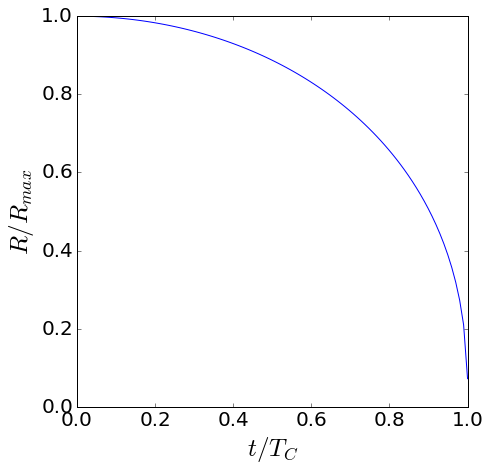

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *

p0=1e5            # ambient pressure
rho=1e3           # density of the liquid
Rmax=1e-3         # maximum radius
t_final = 0.914*Rmax*sqrt(rho/p0) #estimated from the Rayleigh collapse time

# Initial condition
y0=[Rmax,0]
# Times for the solution
t = np.linspace(0, t_final, 100)
# Integrate
sol=odeint(rp, y0, t)
R=sol[:, 0]

plt.figure(figsize=(7,7),dpi=100)
ax1=plt.gca()
ax1.plot(t/t_final,R/Rmax)
ax1.set_xlabel(r'$t/T_C$',size=25);ax1.set_ylabel(r'$R/R_{max}$', size=25)
ax1.tick_params(labelsize=20);

# Rayleigh collapse in a droplet

Consider now the same dynamics of a spherical void removed from a finite sized spherical   droplet. The volume of the droplet (in absence of the spherical void) is $R_{d,0}$. Then the droplet volume is 

$$R_d=\sqrt[3]{R_{d,0}^3+R_b^3}\tag{12}$$

Please note that we now denote the radius of the bubble with $R_b$ to avoid confusion.

We can now formualte analogous to the Bernoulli Eq.(3) a Bernouli equation at the positions $r=R_b$ and $r=R_d$. The velocity potential is unchanged and we obtain

$$\frac{3}{2}\dot{R}_b^{2}+R_b\ddot{R}_b=\frac{3}{2}\dot{R}_d^{2}+R_d\ddot{R}_d+p_{atm}
\tag{13}$$

We can simplify this equation using Eq. (12) by identifying 

\begin{eqnarray}
\dot{R}_d&=&\left(\frac{R_d}{R_b}\right)^2\dot{R_b}\tag{14a}\\
R_d\ddot{R}_d&=&-2\left(\frac{R_b}{R_d}\right)^4\dot{R}_b^2+
2\frac{R_b}{R_d}\dot{R}_b^2+\frac{R_b}{R_d} R_b \ddot{R}_d\tag{14b}
\end{eqnarray}

Let us know introduce the variable $\lambda=R_b/R_d$ and insert Eq. (14a,b) into Eq. (13). The result is:

$$
\dot{R_b}^2\left[\frac{3}{2}+\frac{1}{2}\lambda^4-2\lambda\right]+
R_b\ddot{R}_b\left[1-\lambda\right]=-\frac{p_{atm}}{\rho}\tag{15}
$$

Equation (15) is the equation of motion of a bubble in a droplet.

Next we plot the dynamics of the bubble and the droplet.

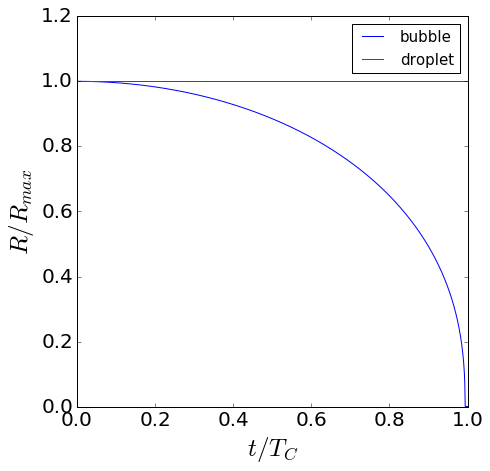

In [51]:
%matplotlib inline
import numpy as np #work with arrays
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from math import *
from ipywidgets import interact
import ipywidgets as widgets

p0=1e5            # ambient pressure
rho=1e3           # density of the liquid
Rbmax=1e-3         # maximum radius
Rd0=Rbmax*0.5

t_final = 0.914*Rbmax*sqrt(rho/p0) #estimated from the Rayleigh collapse time

def rp_drop(y,t):
    global Rd0
    dydt=np.zeros(2) #global array variable
    if (y[0]<1e-6):
        dydt[0]=0.
        dydt[1]=0.
    else:
        Rdd=(Rd0**3.+y[0]**3.)**(1./3.)
        la=y[0]/Rdd
        dydt[0]= y[1]
        dydt[1]= (-p0/rho-y[1]*y[1]*(1.5+.5*la**4.-2.*la))/(y[0]*(1.-la))
    
    return dydt

def plotdroplet(myfactor):
    global Rd0
    Rd0=Rbmax*myfactor                   # rest radius of the droplet
    # Initial condition
    y0=[Rbmax,0.]
    # Times for the solution
    t = np.linspace(0, t_final, 1000)
    # Integrate
    sol=odeint(rp_drop, y0, t)
    Rb=sol[:, 0]
    Rd=(Rd0**3.+Rb**3.)**(1./3.)
    plt.figure(figsize=(7,7),dpi=100)
    ax1=plt.gca()
    ax1.plot(t/t_final,Rb/Rbmax,'b',label='bubble')
    ax1.plot(t/t_final,Rd/Rd0,'g',label='droplet')
    ax1.legend(fontsize=15)
    ax1.set_xlabel(r'$t/T_C$',size=25);ax1.set_ylabel(r'$R/R_{max}$', size=25)
    ax1.tick_params(labelsize=20);

interact(plotdroplet, myfactor = widgets.FloatSlider(min = 0.5, max = 100, step = 0.1, value = 2,\
                                    description = r"$R_d=R_b \cdot$"));

In [9]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom2.css", "r").read()
    return HTML(styles)
css_styling()